In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random



In [2]:
#load the data into data frame
ratings = pd.read_csv("ml-latest-small/ratings.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")
tags = pd.read_csv("ml-latest-small/tags.csv")

In [3]:
#calculate global mean
R_global = ratings["rating"].mean()
R_global

3.501556983616962

In [4]:
#calculate average rating for each user
for uid in range(1,611):
    ratings.loc[ratings["userId"] == uid, "rating_user"] = ratings.loc[ratings["userId"]==uid, "rating"].mean()

In [5]:
#calculate average rating for each movie
for mid in ratings.movieId:
    ratings.loc[ratings["movieId"] == mid, "rating_movie"] = ratings.loc[ratings["movieId"]== mid, "rating"].mean()

In [6]:
r_pivot = ratings.pivot(index = "movieId", columns = "userId", values = ['rating'])
print(r_pivot)

        rating                                          ...                 \
userId     1   2   3   4    5    6    7    8   9   10   ...  601  602  603   
movieId                                                 ...                  
1          4.0 NaN NaN NaN  4.0  NaN  4.5  NaN NaN NaN  ...  4.0  NaN  4.0   
2          NaN NaN NaN NaN  NaN  4.0  NaN  4.0 NaN NaN  ...  NaN  4.0  NaN   
3          4.0 NaN NaN NaN  NaN  5.0  NaN  NaN NaN NaN  ...  NaN  NaN  NaN   
4          NaN NaN NaN NaN  NaN  3.0  NaN  NaN NaN NaN  ...  NaN  NaN  NaN   
5          NaN NaN NaN NaN  NaN  5.0  NaN  NaN NaN NaN  ...  NaN  NaN  NaN   
...        ...  ..  ..  ..  ...  ...  ...  ...  ..  ..  ...  ...  ...  ...   
193581     NaN NaN NaN NaN  NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN  NaN   
193583     NaN NaN NaN NaN  NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN  NaN   
193585     NaN NaN NaN NaN  NaN  NaN  NaN  NaN NaN NaN  ...  NaN  NaN  NaN   
193587     NaN NaN NaN NaN  NaN  NaN  NaN  NaN NaN NaN  ...  NaN

In [7]:
r_pivot.reset_index(level=0, inplace = True)

In [8]:
#make the data ready for UV decomposition, 
#transpose the pivoted data with rows representing users and columns representing movies
header = r_pivot.T.iloc[0].astype(int)
r_t = r_pivot.T[1:]
r_t.columns = header
r_t.index
r_t = r_t.reset_index([None,'userId'])

del r_t['level_0']

r_t = r_t.set_index('userId')



In [9]:
r_t.reset_index(drop = True, inplace=True)

In [10]:
def matrix_factorization(utility_matrix, num_factor, num_iter, learn_rate, regula):
    
    arr_u = np.array(utility_matrix)
    num_user, num_movie = arr_u.shape #the number of rows and columns
    
    
    overall_mean = np.nanmean(arr_u)
    #user_factor = np.random.normal(np.sqrt(overall_mean/num_factor), 0.5, (num_user,num_factor))
    #factor_movie = np.random.normal(np.sqrt(overall_mean/num_factor), 0.5, (num_factor,num_movie))
    
    #user_factor = np.random.uniform(0.1,0.9, (num_user,num_factor))
    #factor_movie = np.random.uniform(0.1,0.9, (num_factor,num_movie))
    
    
    
    
    X_hat = np.dot(user_factor, factor_movie) #initialize the utility matrix
    
    
    RMSE_mf = []   
    
    for n in range(num_iter):
        
        
        e_temp = []
        for i in range(num_user):
            for j in range(num_movie):
                
                if np.isnan(arr_u[i,j])== False:
                    eij = arr_u[i,j] - X_hat[i,j]
                    #e_temp.append(eij**2)
                    user_factor[i,:] = user_factor[i,:] + learn_rate*(2*eij*factor_movie[:,j] - regula*user_factor[i,:])
                    factor_movie[:,j] = factor_movie[:,j] + learn_rate*(2*eij*user_factor[i,:] - regula*factor_movie[:,j])
                    X_hat = np.dot(user_factor, factor_movie) #update X_hat 
            
                    e_temp.append(eij**2)
        RMSE_mf.append(np.sqrt(np.mean(e_temp)))
        
    
    
    
    plt.plot(RMSE_mf,"c*-")
    plt.xlabel("epoch")
    plt.ylabel("RMSE")
    plt.show()
    RMSE = np.sqrt(np.nanmean((arr_u - X_hat)**2))
    MAE = np.nanmean(abs(arr_u - X_hat))
    #print("RMSE:",RMSE)
    #print("MAE:", MAE)
    return np.around(X_hat,1), RMSE, MAE
            
                
    

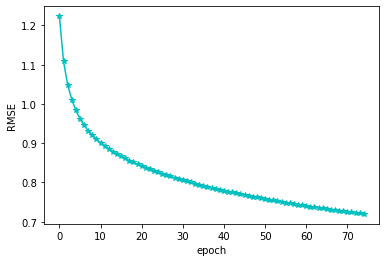

(array([[ 5. ,  4.6,  3.8, ...,  3.8,  4.4,  4.5],
        [ 3.3,  2.8,  3.2, ...,  2.4,  3.8,  3.3],
        [ 2.5,  1.7, -1.5, ...,  0.9,  3.1,  1.9],
        ...,
        [ 3.4,  2.8,  2.4, ...,  3.2,  2.9,  3.8],
        [ 3.3,  2.9,  3. , ...,  2.5,  3.2,  3.4],
        [ 4.1,  3.6,  3.4, ...,  3.1,  3.8,  4. ]]),
 0.6352917658895147,
 0.4853672387190543)

In [11]:
matrix_factorization(r_t,10,75,0.005,0.05)